# Income evaluation

Goal: The goal of this project is to predict people's income categories, either '>50K' or '<=50K' based on various demographic features. 

In [1]:
# importing the libraries..pandas
import pandas as pd
import numpy as np

# Loading the data-set.

In [2]:
df=pd.read_csv("Downloads/income_evaluation.csv") #loading the dataset..
df.head() #gives the first five rows in the data-set..

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Describing the Data

In [3]:
# describing the data in the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# info: gives the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# strip: removing the whitespaces..
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
# shape returns the number of rows and columns in the dataset..
df.shape

(32561, 15)

The data-set contains 32561 rows and 14 features + the target variable (Income). 4 are integers and 9 are objects and 1 categorical.
The target variable from the dataset is "Income" and the others are the independent variables.

In [7]:
df["education"].value_counts()
# the education column does not consists of null values or missing values.

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [8]:
df.occupation.value_counts()
# the occupation column contain a missing values.

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [9]:
df.workclass.value_counts()
# the workclass consists of the missing values.(?)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
df["native-country"].unique()
# the native-country column consists of the "?" values missing

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [11]:
df[["education","education-num"]].value_counts()

education     education-num
HS-grad       9                10501
Some-college  10                7291
Bachelors     13                5355
Masters       14                1723
Assoc-voc     11                1382
11th          7                 1175
Assoc-acdm    12                1067
10th          6                  933
7th-8th       4                  646
Prof-school   15                 576
9th           5                  514
12th          8                  433
Doctorate     16                 413
5th-6th       3                  333
1st-4th       2                  168
Preschool     1                   51
Name: count, dtype: int64

The matching education level of the education number:
1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,
10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate
from the output we can say the columns education and education-num are correlated with each other.

In [12]:
# checking duplicates with sum(count)
print("Duplicates:\n",df.duplicated().sum())

Duplicates:
 24


In [13]:
# checking the duplicates after removing.
print("After Dropping duplicates:")
print(df.drop_duplicates(inplace=True))

After Dropping duplicates:
None


In [14]:
df.shape
# 32561 rows turned into 32537 rows

(32537, 15)

In [15]:
df["income"].value_counts()
# the data here is imbalanced.

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [16]:
# stripping the categories in the coulmns 
df["workclass"]=df["workclass"].str.strip()
print("Work-class:",df["workclass"].unique())
print("\n")
df["occupation"]=df["occupation"].str.strip()
print("occupation:",df["occupation"].unique())
print("\n")
df["native-country"]=df["native-country"].str.strip()
print("native-country:",df["native-country"].unique())

Work-class: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [17]:
print(df["occupation"].mode())
print("\n")
print(df["workclass"].mode())
print("\n")
print(df["native-country"].mode())

0    Prof-specialty
Name: occupation, dtype: object


0    Private
Name: workclass, dtype: object


0    United-States
Name: native-country, dtype: object


In [18]:
# Replace '?' with NaN(null values)
df.replace({'occupation': {'?': np.nan}}, inplace=True)
df.replace({'workclass': {'?': np.nan}}, inplace=True)
df.replace({'native-country': {'?': np.nan}}, inplace=True)

In [19]:
# checking if the occupation 
df["occupation"].isnull().sum()

1843

In [20]:
# checking if the occupation 
df["workclass"].isnull().sum()

1836

In [21]:
# checking if the occupation 
df["native-country"].isnull().sum()

582

In [22]:
# Fill NaN with mode
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [23]:
df["occupation"].isnull().sum()

0

In [24]:
df["workclass"].isnull().sum()

0

In [25]:
df["native-country"].isnull().sum()

0

In [26]:
# here the dataset consists of the 
skew=df.groupby("income")["age"].skew()
# the age-distributions are right-skewed.

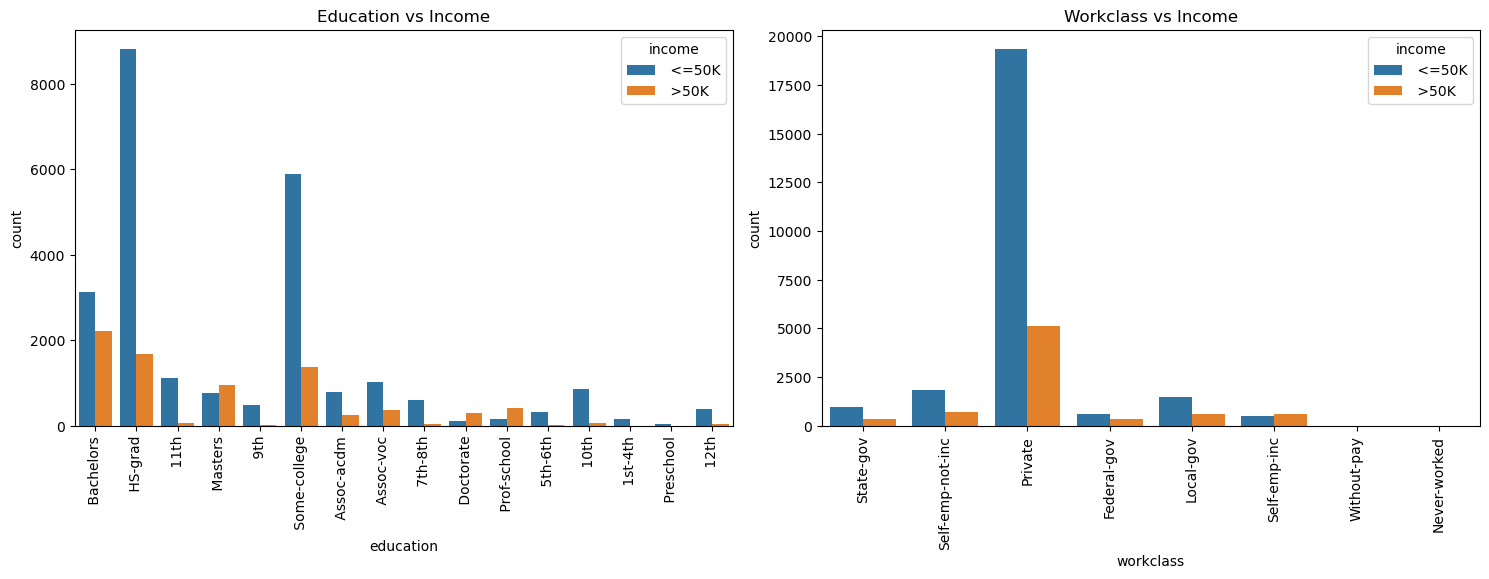

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

# 1. Education vs Income
plt.subplot(2,2,1) # subplot(row,col,index)
sns.countplot(data=df, x='education', hue='income')
plt.title("Education vs Income")
plt.xticks(rotation=90)

# 2. workclass vs Income
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='workclass', hue='income')
plt.title("Workclass vs Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Professional and managerial roles also correlate strongly with higher income.
# People with Bachelors, Masters, Doctorate, and Prof-school have higher chances of earning >50K.
# therefore.. people with higher education and high position have higher income potential..

# most people work in the private sector, but government and incorporated self-employment seem to offer better chances of earning >50K.

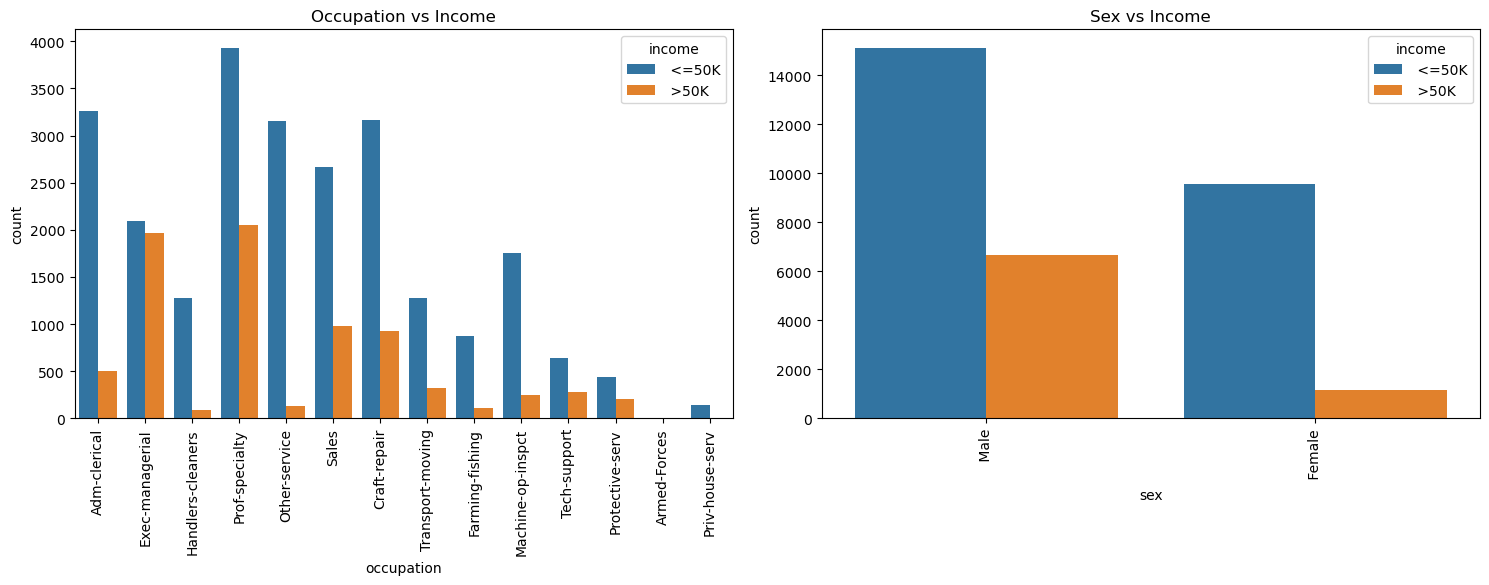

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

# 1.Occupation vs Income
plt.subplot(2,2,1) # subplot(row,col,index)
sns.countplot(data=df, x='occupation', hue='income')
plt.title("Occupation vs Income")
plt.xticks(rotation=90)

# 2. Age vs Income
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='sex', hue='income')
plt.title("Sex vs Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Professional and managerial roles also correlate strongly with higher income.

# therefore.. people with higher education and high position have higher income potential..

# most people work in the private sector, but government and incorporated self-employment seem to offer better chances of earning >50K.
# Among those earning >50K:
# There are significantly more males than females.
# most of them earn <=50k.from both male and female.

# Data Preprocessing.

In [29]:
correlation=df.corr(numeric_only=True)
correlation

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


<Axes: >

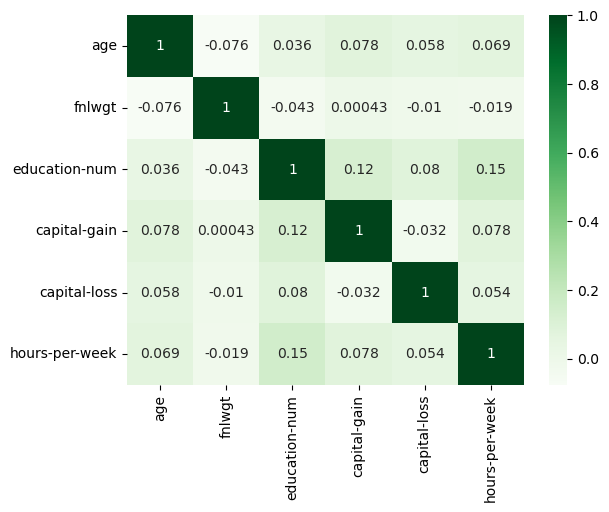

In [30]:
# from the heat-map the income is highly(34%) correlated with the education.and less
sns.heatmap(correlation,annot=True,cmap="Greens")

In [31]:
# from the data the final weight not much correlation so we are dropping the data.
df = df.drop('fnlwgt', axis=1)

In [32]:
# changing the income values into 0 and 1
from sklearn.preprocessing import LabelEncoder
income_le=LabelEncoder()
sex_le=LabelEncoder()
workclass_le=LabelEncoder()
occupation_le=LabelEncoder()



df["income"]=income_le.fit_transform(df["income"])
df["sex"]=sex_le.fit_transform(df["sex"])
df["workclass"]=workclass_le.fit_transform(df["workclass"])
df["occupation"]=occupation_le.fit_transform(df["occupation"])


print(df["income"].unique())
print(income_le.classes_)
print(df["sex"].unique())
print(sex_le.classes_)
print(df["occupation"].unique())
print(occupation_le.classes_)

[0 1]
[' <=50K' ' >50K']
[1 0]
[' Female' ' Male']
[ 0  3  5  9  7 11  2 13  4  6 12 10  1  8]
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


In [33]:
print("Income mapping:")
for i, label in enumerate(income_le.classes_):
    print(f"{label} --> {i}")

print("\nSex mapping:")
for i, label in enumerate(sex_le.classes_):
    print(f"{label} --> {i}")

print("\nWorkclass mapping:")
for i, label in enumerate(workclass_le.classes_):
    print(f"{label} --> {i}")

print("\nOccupation mapping:")
for i, label in enumerate(occupation_le.classes_):
    print(f"{label} --> {i}")


Income mapping:
 <=50K --> 0
 >50K --> 1

Sex mapping:
 Female --> 0
 Male --> 1

Workclass mapping:
Federal-gov --> 0
Local-gov --> 1
Never-worked --> 2
Private --> 3
Self-emp-inc --> 4
Self-emp-not-inc --> 5
State-gov --> 6
Without-pay --> 7

Occupation mapping:
Adm-clerical --> 0
Armed-Forces --> 1
Craft-repair --> 2
Exec-managerial --> 3
Farming-fishing --> 4
Handlers-cleaners --> 5
Machine-op-inspct --> 6
Other-service --> 7
Priv-house-serv --> 8
Prof-specialty --> 9
Protective-serv --> 10
Sales --> 11
Tech-support --> 12
Transport-moving --> 13


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  int32 
 2   education       32537 non-null  object
 3   education-num   32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  int32 
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  int32 
 9   capital-gain    32537 non-null  int64 
 10  capital-loss    32537 non-null  int64 
 11  hours-per-week  32537 non-null  int64 
 12  native-country  32537 non-null  object
 13  income          32537 non-null  int32 
dtypes: int32(4), int64(5), object(5)
memory usage: 3.2+ MB


In [35]:
df=df.drop(columns=["education","relationship","race","native-country","marital-status","capital-gain","capital-loss"])

In [36]:
df.columns

Index(['age', 'workclass', 'education-num', 'occupation', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [37]:
df["income"].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X=df.drop("income",axis=1)
y=df["income"]


from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
print(y_train.value_counts())

income
1    19781
0    19735
Name: count, dtype: int64


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8595141700404858
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4963
           1       0.82      0.91      0.87      4917

    accuracy                           0.86      9880
   macro avg       0.86      0.86      0.86      9880
weighted avg       0.86      0.86      0.86      9880



In [49]:
# Random Forest is better for the data.

In [50]:
import joblib
joblib.dump(model,r"C:\Users\mutyalasravanthi\OneDrive\Desktop\Income_Eval\Model.h5")

['C:\\Users\\mutyalasravanthi\\OneDrive\\Desktop\\Income_Eval\\Model.h5']